# Install Utilities



## SRAtoolkit
---
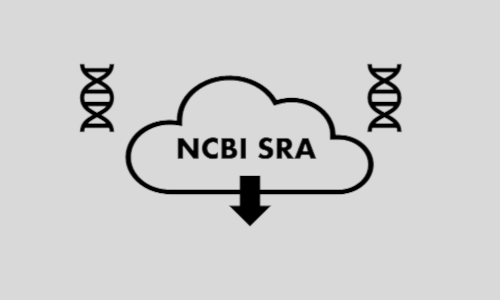

#### Installation

To begin, you must download SRAtoolkit in order to use the fastq-dump tool, which allows you to download SRA files.

In [1]:
!wget -q --output-document sratoolkit.tar.gz https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/3.1.0/sratoolkit.3.1.0-ubuntu64.tar.gz
!tar -xzf sratoolkit.tar.gz

Then, to test the download, you can see the first three reads from a single SRA accession number.

In [2]:
!sratoolkit.3.1.0-ubuntu64/bin/fastq-dump -X 3 SRR11537950 --stdout

Read 3 spots for SRR11537950
Written 3 spots for SRR11537950
@SRR11537950.1 length=126
TGACTTTCACTAGTACGTCCCGTTAGGCTTAACTATCTTAACAAACTTTGAGTGCAAGAGATTGAAGAGTTCAAATCTGACCAAGATGTTGATGTTGGATAAGAGAATTCTCTGCTCCCCACCTCT
+SRR11537950.1 length=126
BAAD4@ADCBCCCD@DDDDCDAB@CDDCDACDDCBDCCCCDEDBDDCCCA:BDDDCCDDDECBDECCBBCBEDBBBCACACBC=CB@CCBC4>BBC<B?BC@CCDEC?D;CCDCCBC@C>BCDC>9
@SRR11537950.2 length=126
GTTCTCGCACCCATTCCGCCGTCAACGGTTTTTTTGAAGTCTTCACAGGCCAGCCAGAATTCAATATTTTCTTCACAGAATTCCGACTTTAAAAAAGCCCTGAATGCAGCAAGCCCATTTGATGAA
+SRR11537950.2 length=126
BBBCBCDCBDCBDC:ADDCDBABCBCCCBC>ACCBB9>>CCBCB=7CCCB@BCCBABABBBCB2B>@CBBBB?BBCBADB22<C?*DA5AB0B/?'B=BC::0AB-C-AB@BB%BBA00/<<6@41
@SRR11537950.3 length=126
CCGTGGAGTCTAGTGTCCTAAGAAGTCCCATGCCAATGCAACCTCCCCAGAGAGGGTTTCCCTATCCCCTGCCTGAGGTGCCACAATGACACCCATCACTCCTCAGCCCATGGCATTGTCTTTTTT
+SRR11537950.3 length=126
CC>AC?+A?BA<CB?28DC0>,<-A,ADB@;@B2B<>A@?ACC7DBB?@<A=?@BC?<BBBC>A?DBBAAB>?@D?34C@C@<>;??C>D:@DA<?CB7ADA?BB>6?D?B@%9;A<:1BB>396*


#### Dowload from SRA

In [3]:
!sratoolkit.3.1.0-ubuntu64/bin/fastq-dump --split-files --gzip -X 1000000 SRR11537950
!mkdir -p SRR11537950
!mv SRR11537950*.fastq.gz SRR11537950/
!mv SRR11537950/SRR11537950_1.fastq.gz SRR11537950/SRR11537950_S1_L001_R1_001.fastq.gz
!mv SRR11537950/SRR11537950_2.fastq.gz SRR11537950/SRR11537950_S1_L001_R2_001.fastq.gz

Read 1000000 spots for SRR11537950
Written 1000000 spots for SRR11537950


In [ ]:
!ls

sample_data  sratoolkit.3.1.0-ubuntu64	sratoolkit.tar.gz  SRR11537950


#Cell Ranger

---


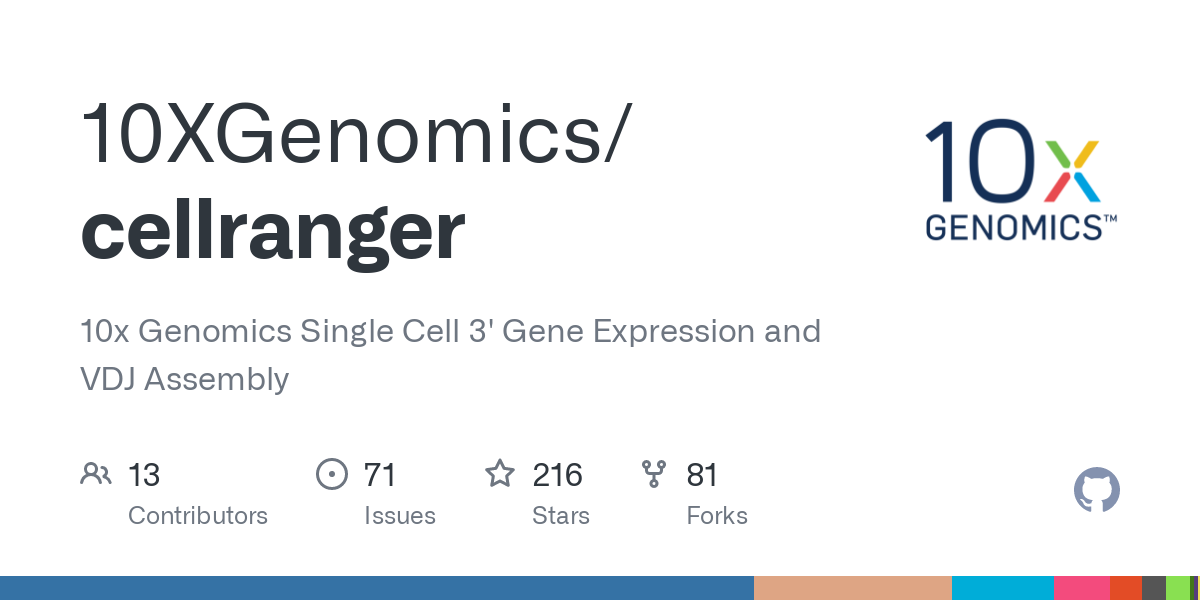

**Note:** Cellranger requires more than 12GB of RAM to run (it does not work with Colab).

#### Dowload

Get a download link for Cellranger [here](https://support.10xgenomics.com/single-cell-gene-expression/software/downloads/latest) and paste this link below. The following code downloads the software and the relevant genomic reference (find the newest file on this same website under "References").


Note: we are downloading a human reference here, choose a different organism if necessary.

Note: The reference file is >10 GB large, the download will take a few minutes.

Note: remove incomplete downloads by clicking on the file symbol on the right panel in colab, and deleting (via right click) all files that correspond to incomplete downloads. If you don't do this, the full download will have a numeric suffix and will not be used below, resulting in errors.

In [5]:
!wget -q --output-document cellranger-8.0.1.tar.gz  "[PUT DOWNLOAD LINK HERE]"
# FOR EXAMPLE:
# !wget -q --output-document cellranger-8.0.1.tar.gz  "https://cf.10xgenomics.com/releases/cell-exp/cellranger-8.0.1.tar.gz?Expires=1718344529&Key-Pair-Id=APKAI7S6A5RYOXBWRPDA&Signature=m0~4sFngj0N2Utu7~gZMOYuD-fvudS4mK2zheUC2dkrpoiEgiYEQvp8jbnPL7npWWNPknRhC1zD~gm31Wn~bPOkRH~vYrMFf4QweYAvdBmARNUkXikShjhZHFOl9sAQ0-jABm6pgYa~rfl1MB2cAxesSbxXkMletv3lc-SCwSrSxQidzYUoDipDwMJwD00zXjRcmJ63Jrqr9IOhegguCnvJcO4CIdM10ovmzee9uPW2BzjLxGQuLZs7GXlU1HU9pUHinFjUpMPO4D-D4TGcg8mrIJBF590W0wSCewobPdUqEmLj2AHxZ2o41pDCG9jDFrKEvq3EOI7DUNuLmf762CQ__"
!wget https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-GRCh38-2024-A.tar.gz

--2024-06-13 21:06:12--  https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-GRCh38-2024-A.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11481868421 (11G) [application/x-tar]
Saving to: ‘refdata-gex-GRCh38-2024-A.tar.gz.1’

refdata-gex-GRCh38- 100%[===================>]  10.69G   158MB/s    in 89s     

2024-06-13 21:07:41 (123 MB/s) - ‘refdata-gex-GRCh38-2024-A.tar.gz.1’ saved [11481868421/11481868421]



#### Installation

It merely has to be decompressed to be installed.

Note: adatpt the versions in the file names if you changed the download links above.

In [6]:
!tar -xzf cellranger-8.0.1.tar.gz
!tar -xzf refdata-gex-GRCh38-2024-A.tar.gz

Again, adapt the versions if necessary, both in the command "cellrange-VERSION" and in the argument "--transcriptome=refdata-gex-VERSION":

Note: you need to delete incomplete runs if cellranger aborts with an error, eg. via:

```
!rm -rf run_count_SRR11537950
```

In [7]:
# !rm -rf run_count_SRR11537950
!cellranger-8.0.1/bin/cellranger count --id=run_count_SRR11537950 --transcriptome=refdata-gex-GRCh38-2024-A --create-bam=true --fastqs=SRR11537950 --sample=SRR11537950 --chemistry=fiveprime --localcores=1 --localmem=5



Martian Runtime - v4.0.12
Serving UI at http://3c4587140012:34067?auth=OUvOsUEGg4YhoSstXnClMiGMLg8MoPnDrl7TgLkakFs

Running preflight checks (please wait)...
Checking sample info...
Checking FASTQ folder...
Checking reference...
Checking reference_path (/content/refdata-gex-GRCh38-2024-A) on 3c4587140012...
Checking optional arguments...
mro: v4.0.12
mrp: v4.0.12
python: Python 3.10.8
numpy: 1.24.4
scipy: 1.10.1
pysam: 0.21.0
h5py: 3.9.0
pandas: 2.1.4
STAR: 2.7.2a
samtools: samtools 1.16.1
2024-06-13 21:14:36 [runtime] (ready)           ID.run_count_SRR11537950.SC_RNA_COUNTER_CS.SC_MULTI_CORE.COPY_VDJ_REFERENCE
2024-06-13 21:14:36 [runtime] (ready)           ID.run_count_SRR11537950.SC_RNA_COUNTER_CS.SC_MULTI_CORE.MAKE_FULL_CONFIG._MAKE_VDJ_CONFIG
2024-06-13 21:14:36 [runtime] (run:local)       ID.run_count_SRR11537950.SC_RNA_COUNTER_CS.SC_MULTI_CORE.MAKE_FULL_CONFIG._MAKE_VDJ_CONFIG.fork0.chnk0.main
2024-06-13 21:14:36 [runtime] (ready)           ID.run_count_SRR11537950.SC_RNA_COUN

#### Cellranger outputs running one sample

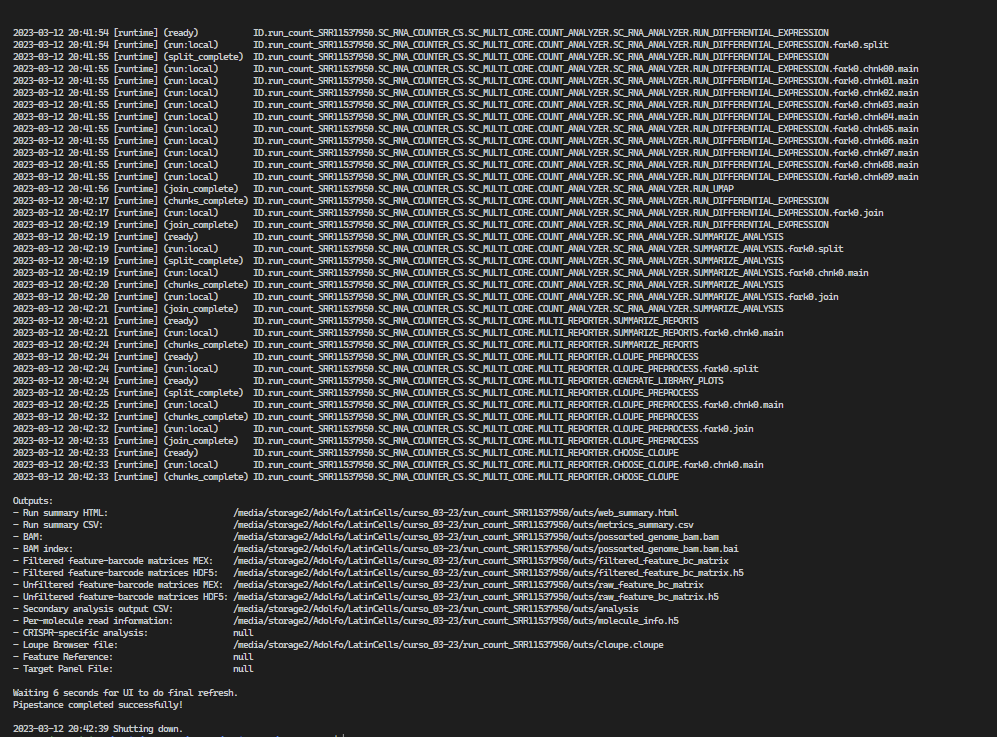



*   The Cell Ranger software strives to maintain compatibility with common analysis tools by using standard output file formats whenever possible. For example, the barcoded BAM files can be viewed in standard genome browsers such as IGV to verify alignment quality and other features.



The cellranger count pipeline outputs an interactive summary HTML file named web_summary.html that contains summary metrics and automated secondary analysis results. Let's check it out!!! - https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/summary


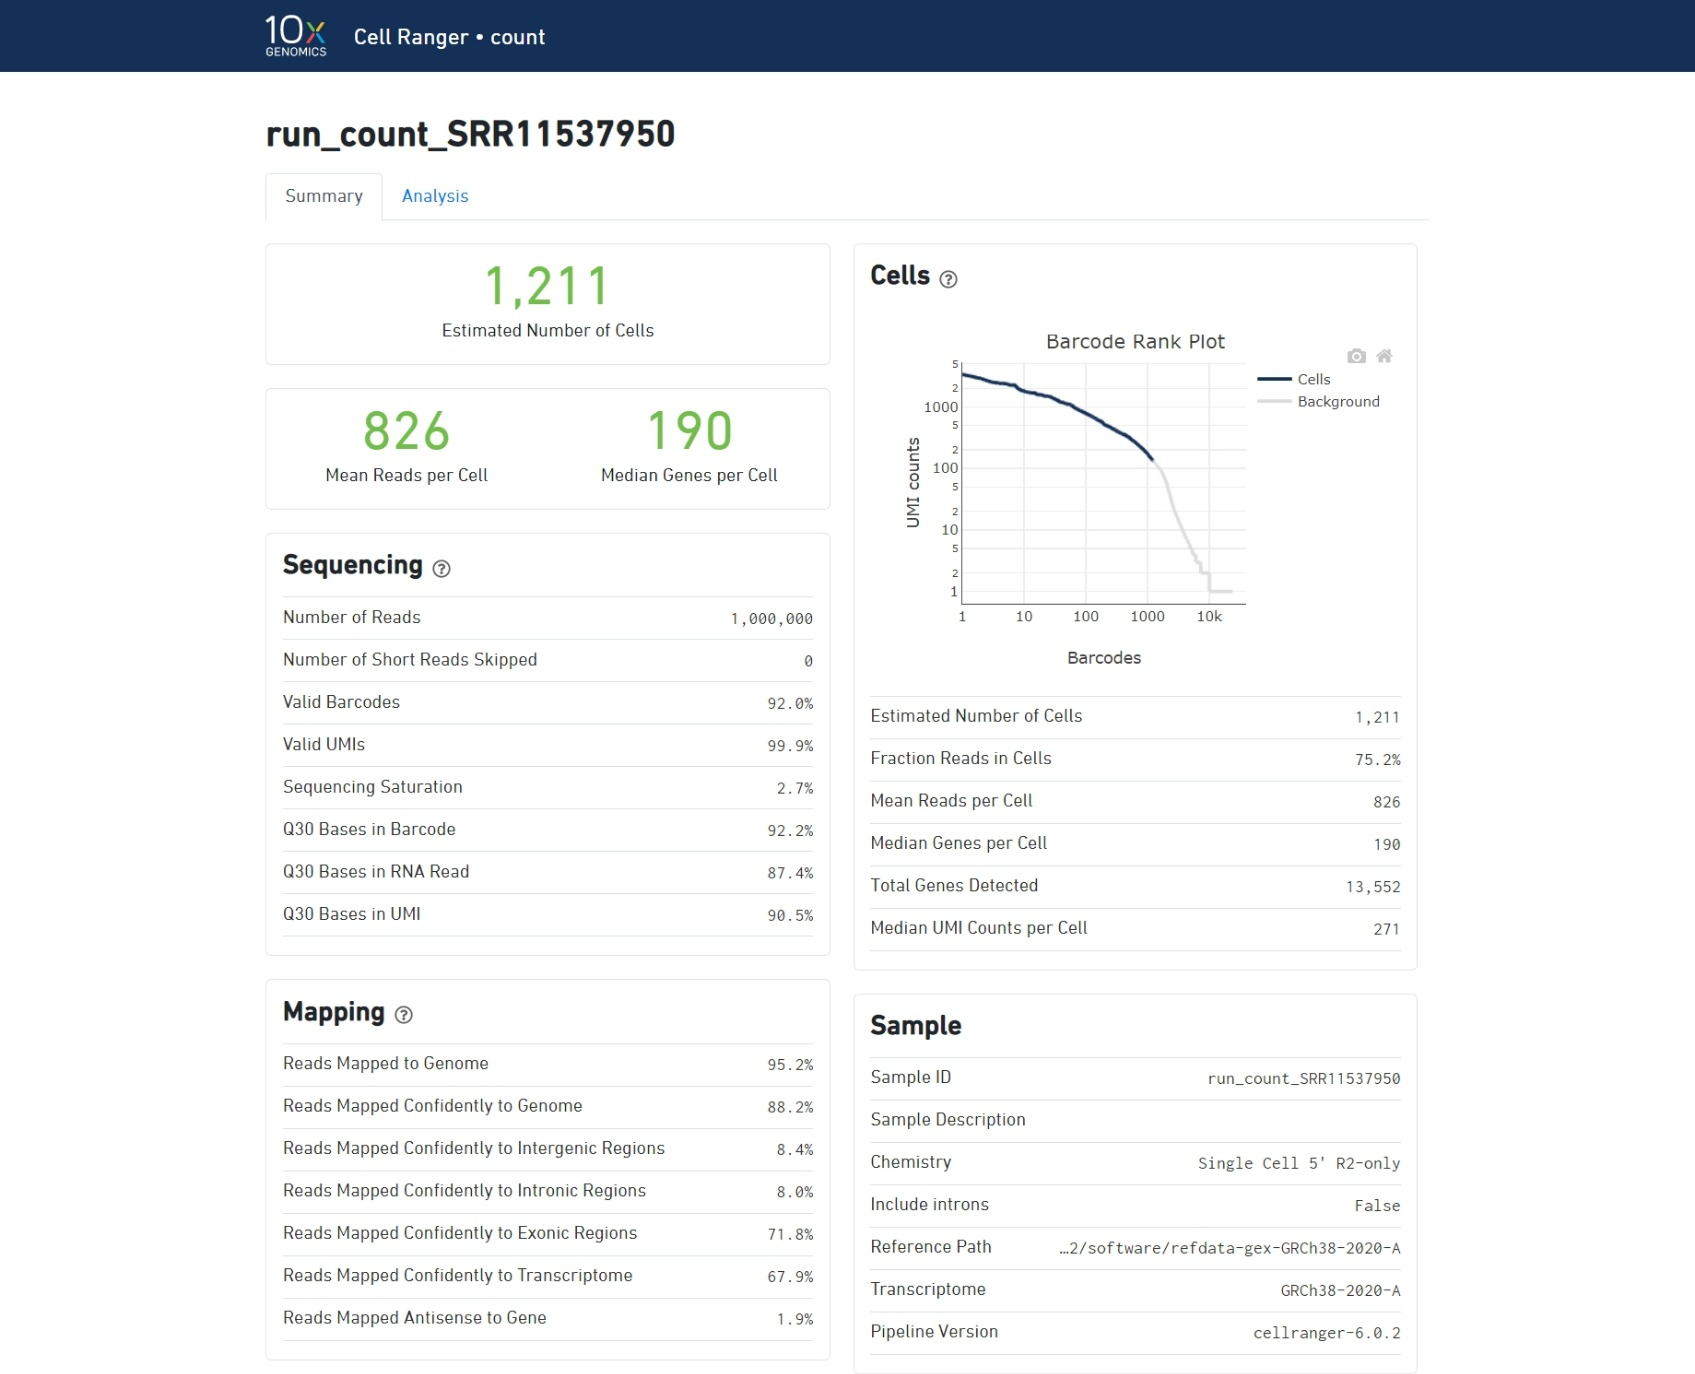

Green text indicates that the key metrics are in the expected range while red/yellow text indicates errors/warnings.

Barcode Rank Plot:
A steep drop-off is indicative of good separation
between the cell-associated barcodes and the barcodes
associated with empty GEMs.

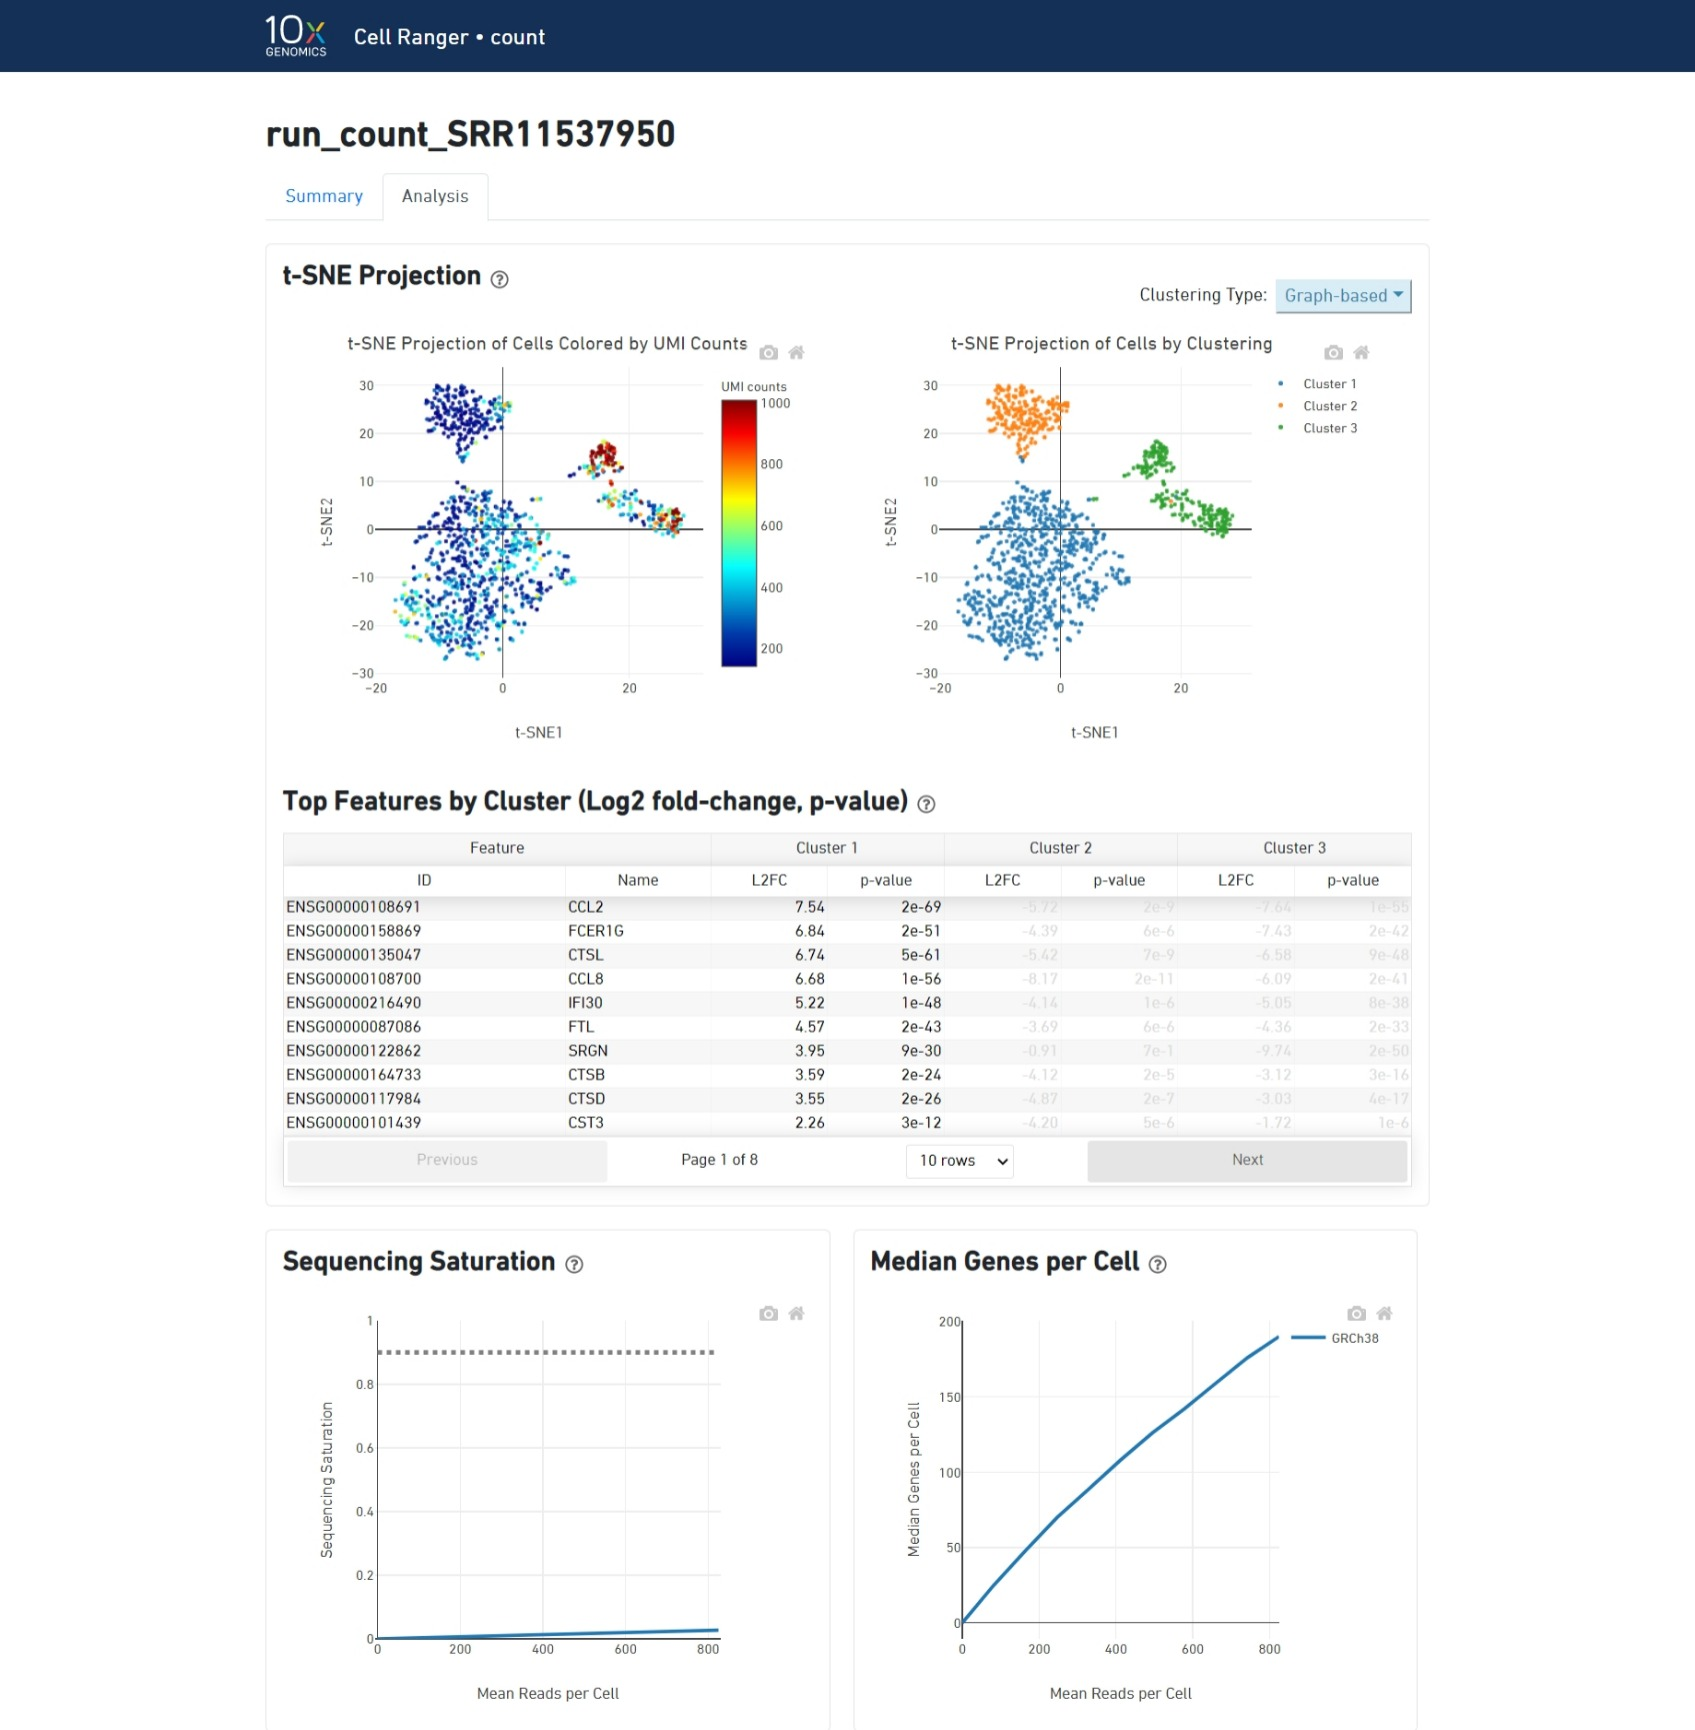